In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.platform import _pywrap_cpu_feature_guard

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8707 - loss: 0.4648 - val_accuracy: 0.9596 - val_loss: 0.1332
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9665 - loss: 0.1175 - val_accuracy: 0.9716 - val_loss: 0.0964
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9792 - loss: 0.0739 - val_accuracy: 0.9786 - val_loss: 0.0714
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9853 - loss: 0.0498 - val_accuracy: 0.9776 - val_loss: 0.0722
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9897 - loss: 0.0355 - val_accuracy: 0.9794 - val_loss: 0.0691
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9935 - loss: 0.0246 - val_accuracy: 0.9812 - val_loss: 0.0630
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9954 - loss: 0.0186 - val_accuracy: 0.9824 - val_loss: 0.0617
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9967 - loss: 0.0144 - val_accu

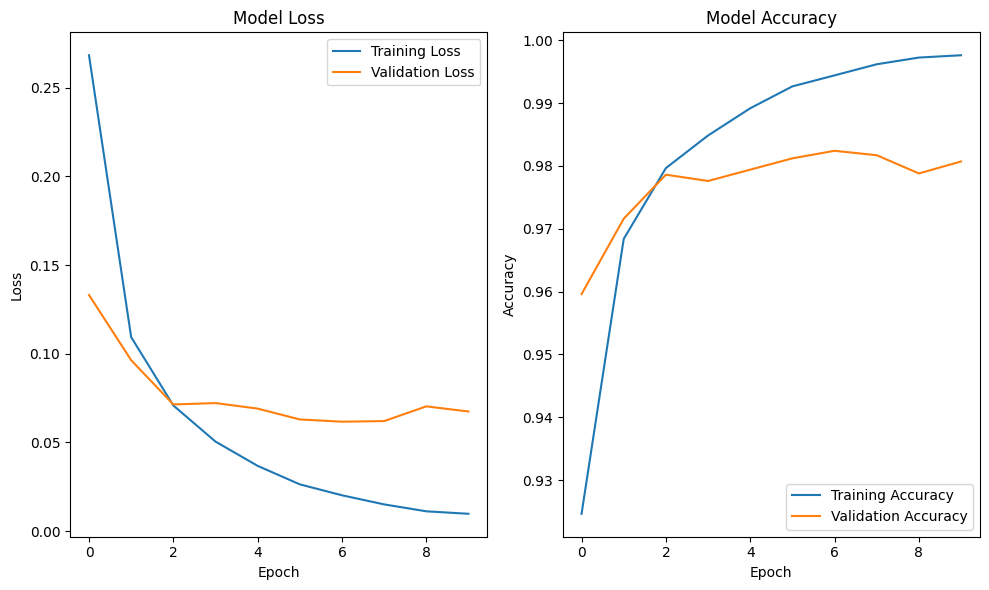

In [9]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
img_rows, img_cols = 28, 28
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create model
model = Sequential([
    Dense(512, activation='relu', input_shape=(img_rows*img_cols,)),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model history
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation loss/accuracy
plt.figure(figsize=(10, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
